#### A frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome. Frequency distributions are generally constructed by running several experiments and incrementing the count for a sample every time it is an outcome of an experiment. Here we are identifying the words with their recurrence, dropping out the words in lower end (<50) and viewing high end for message.  ####

In [6]:
#The tools to be used
import pandas as pd
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [7]:
# Using the file downloaded from Washington Post. Because I am using the Unabomber 
# Manifesto Text published by WP. As this is not part of Webtext corpus, we added it 
# there to use it with webtext.words('manifesto.txt')
# Webtext Directory is C:\Users\chandra\AppData\Roaming\nltk_data\corpora\webtext """

WP_words = webtext.words('manifesto.txt')
word_list = nltk.FreqDist(WP_words)
word_list


FreqDist({'the': 1735, '.': 1686, ',': 1540, 'of': 1251, 'to': 1078, 'a': 736, 'and': 719, 'that': 657, 'is': 611, 'in': 546, ...})

In [8]:
 
# We are dropping numbers and other special characters appears like words and selecting the specific words only 
# if their frequency is greater than 100. This 100 is only arbitrary, because we only testing the tools here. 
filter_words = dict([(m, n) for m, n in word_list.items() if (m >= "A") and (n>50)])
filter_words = dict(sorted(filter_words.items(), key=lambda item: item[1],reverse = True)) 


In [9]:
print('Un_cleaned Words: Frequency (10)')
i=0
for key in filter_words:
    if i<10 :
        print("%s: %s" % (key, filter_words[key]))
        i=1+i
    else:  
        pass

Un_cleaned Words: Frequency (10)
the: 1735
of: 1251
to: 1078
a: 736
and: 719
that: 657
is: 611
in: 546
be: 412
for: 351


In [10]:

df= pd.DataFrame(list(filter_words.items()), columns=['word', 'count'])

print ("High Frequency Words")
print(df.head(10))
print('\n' * 2)
print ("Low Frequency Words")
print(df.tail(10))



High Frequency Words
   word  count
0   the   1735
1    of   1251
2    to   1078
3     a    736
4   and    719
5  that    657
6    is    611
7    in    546
8    be    412
9   for    351



Low Frequency Words
             word  count
89       behavior     59
90           work     59
91          those     55
92  psychological     55
93       leftists     54
94        control     54
95            its     51
96            use     51
97         nature     51
98          goals     51


C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


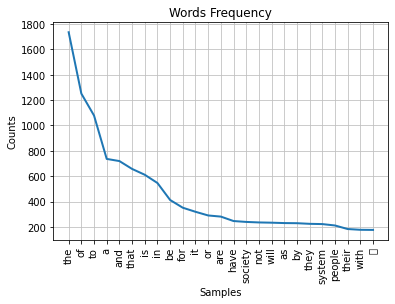

In [11]:
word_list = nltk.FreqDist(filter_words)
ax=word_list.plot(25, cumulative=False,title= "Words Frequency")

### Observation: ###
the, of, to, a, and ..... are some highly reapated words.  
Unless we find a way to remove these stop words, our analysis cannot be very useful.
for i in range(10):

In [12]:
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))
#print (stop_words)
#removing stop words
stopfree_words =[]
for word in WP_words:
    if word not in stop_words:
        if len (word) > 3:
            stopfree_words.append(word)
stopfree_analysis= FreqDist(stopfree_words)

In [13]:
stopfree_words = dict([(m, n) for m, n in stopfree_analysis.items() if (m >= "A") and (n>50)])
stopfree_words = dict(sorted(stopfree_words.items(), key=lambda item: item[1],reverse = True))

In [14]:
print('Cleaned Words: Frequency')
for key in stopfree_words:
    try:
        print("%s: %s" % (key, filter_words[key]))
    except Exception:
        pass

Cleaned Words: Frequency
society: 239
system: 222
people: 211
power: 165
would: 152
human: 134
technology: 120
social: 94
many: 89
modern: 88
freedom: 84
industrial: 81
process: 71
make: 70
leftist: 70
problems: 66
need: 64
technological: 59
behavior: 59
work: 59
psychological: 55
leftists: 54
control: 54
nature: 51
goals: 51


In [15]:
df2= pd.DataFrame(list(stopfree_words.items()), columns=['word', 'count'])

print ("High Frequency Words")
print(df2.head(10))
print('\n' * 2)
print ("Low Frequency Words")
print(df2.tail(10))

High Frequency Words
         word  count
0     society    239
1      system    222
2      people    211
3       power    165
4       would    152
5       human    134
6  technology    120
7      social     94
8        many     89
9      modern     88



Low Frequency Words
             word  count
15       problems     66
16           need     64
17  technological     59
18       behavior     59
19           work     59
20  psychological     55
21       leftists     54
22        control     54
23         nature     51
24          goals     51


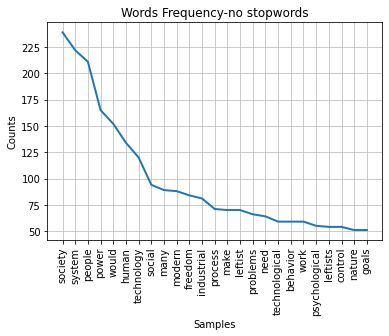

In [16]:
stopfree_analysis= FreqDist(stopfree_words)
ax1 = stopfree_analysis.plot(25, cumulative=False,title= "Words Frequency-no stopwords")

### Observation:
List changed a lot  All expected stop words  are removed. 
“society, system, people, power and would” are new first five words comparing with “the, of, to, a, and”. We still have the “would” there. 

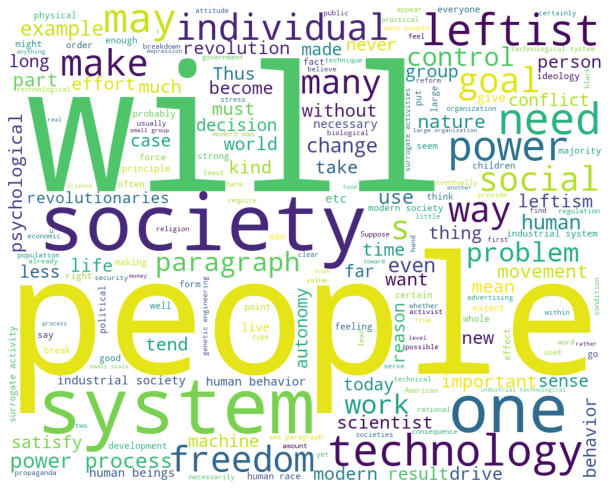

In [18]:
# importing all necessary modules

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
f = open('manifesto.txt')
manifesto = f.read()

# Unprocessed Text:
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 10).generate(manifesto) 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -1)
 
plt.show()